<a href="https://colab.research.google.com/github/ricoprediansyah/CV-FASTER_RCNN_SUGARCANE/blob/main/CV_FASTER_RCNN_TEBU_METODE_CONVER_YOLO_TO_VOC_%5BGAGAL%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AKUN PPK ORMAWA FILE DATASET TEBU

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Verifikasi lokasi penyimpanan
!ls /content/drive/MyDrive

Mounted at /content/drive
 12D77A99-66D0-405A-B77B-11AF02B259AF.mov    IMG_0537.HEIC   IMG_0613.HEIC
 2538A4D8-9A9D-482C-9033-502D13149434.mov    IMG_0538.HEIC   IMG_0616.MOV
 3946FBAA-D3DD-4133-A870-10AEF6B955FE.mov    IMG_0539.HEIC   IMG_0617.MOV
 713021189.798886.mp4			     IMG_0540.HEIC   IMG_0619.HEIC
 7DF06769-5067-41BC-B4A6-1424A9029665.mov    IMG_0541.MOV    IMG_0620.MOV
 83EB5BEB-86A8-4120-9120-4FF91A620FFB.mov    IMG_0543.MOV    IMG_0621.HEIC
 8C1E2427-60B8-40DC-9D7A-C5FD21253BBE.mov    IMG_0545.MOV    IMG_0622.HEIC
 8D959CC7-9368-42B0-940D-F2C172A38FE7.mov    IMG_0547.MOV    IMG_0623.HEIC
 A0AC54E6-FADB-4621-BE36-2A36D3B84FA5.mp4    IMG_0548.HEIC   IMG_0624.MOV
 B60C3DE9-0020-419D-B36B-AE1A8E2CA8E2.mov    IMG_0549.HEIC   IMG_0625.MOV
 BF19128C-610A-478A-B13A-0C61A8287D29.mov    IMG_0557.MOV    IMG_0626.MOV
 CA92F1D5-7A96-4A20-883D-33EF712D534F.mov    IMG_0558.MOV    IMG_0629.MOV
'Colab Notebooks'			     IMG_0559.MOV    IMG_0630.MOV
 DE4ECCC2-77CB-42E3-A01B-532E798AB0E9.mov  

In [ ]:
!mv /content/drive/MyDrive/TEBU/Dataset-20241020T071728Z-001.zip /content/

In [ ]:
import zipfile
import os

# Path ke file ZIP
zip_file_path = '/content/Dataset-20241020T071728Z-001.zip'
extract_path = '/content/'

# Ekstrak file ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verifikasi hasil ekstrak
os.listdir(extract_path)


['.config',
 'Dataset-20241020T071728Z-001.zip',
 'Dataset',
 'drive',
 'sample_data']

##CONVERT DARI YOLO KE VOC

In [ ]:
import os
import xml.etree.ElementTree as ET
from PIL import Image

def yolo_to_voc(yolo_path, voc_path, image_width, image_height):
    # Membaca file anotasi YOLO
    with open(yolo_path, 'r') as file:
        lines = file.readlines()

    # Membuat elemen root untuk tree XML Pascal VOC
    root = ET.Element("annotation")

    # Menambahkan elemen 'folder'
    folder = ET.SubElement(root, "folder")
    folder.text = "Dataset-voc"  # Nama folder yang digunakan

    # Menambahkan elemen 'filename'
    filename = ET.SubElement(root, "filename")
    filename.text = os.path.basename(yolo_path).replace('.txt', '.jpg')

    # Menambahkan elemen 'size'
    size = ET.SubElement(root, "size")
    width = ET.SubElement(size, "width")
    height = ET.SubElement(size, "height")
    depth = ET.SubElement(size, "depth")
    width.text = str(image_width)
    height.text = str(image_height)
    depth.text = "3"  # Asumsi gambar RGB

    # Mengonversi setiap baris YOLO menjadi bounding box VOC
    for line in lines:
        parts = line.split()
        class_id, center_x, center_y, bbox_width, bbox_height = map(float, parts)

        # Menambahkan elemen 'object' untuk setiap bounding box
        obj = ET.SubElement(root, "object")

        # Menambahkan nama kelas (class_id + 1)
        name = ET.SubElement(obj, "name")
        name.text = str(int(class_id) + 1)  # Asumsi class_id dimulai dari 0 di YOLO

        # Menambahkan elemen-elemen lain
        pose = ET.SubElement(obj, "pose")
        pose.text = "Unspecified"
        truncated = ET.SubElement(obj, "truncated")
        truncated.text = "0"
        difficult = ET.SubElement(obj, "difficult")
        difficult.text = "0"

        # Menambahkan elemen 'bndbox' dan konversi koordinat
        bndbox = ET.SubElement(obj, "bndbox")
        xmin = ET.SubElement(bndbox, "xmin")
        ymin = ET.SubElement(bndbox, "ymin")
        xmax = ET.SubElement(bndbox, "xmax")
        ymax = ET.SubElement(bndbox, "ymax")

        # Mengonversi koordinat relatif YOLO ke koordinat absolut VOC
        xmin.text = str(int((center_x - bbox_width / 2) * image_width))
        ymin.text = str(int((center_y - bbox_height / 2) * image_height))
        xmax.text = str(int((center_x + bbox_width / 2) * image_width))
        ymax.text = str(int((center_y + bbox_height / 2) * image_height))

    # Menyimpan tree XML ke file VOC
    tree = ET.ElementTree(root)
    tree.write(voc_path)

def convert_yolo_to_voc_folder(yolo_folder, image_folder, voc_image_folder, voc_annotation_folder):
    # Buat folder jika belum ada
    os.makedirs(voc_image_folder, exist_ok=True)
    os.makedirs(voc_annotation_folder, exist_ok=True)

    # Konversi setiap file label YOLO
    for yolo_file in os.listdir(yolo_folder):
        if yolo_file.endswith('.txt'):
            # Tentukan jalur untuk gambar yang sesuai dan file label VOC
            image_file = yolo_file.replace('.txt', '.jpg')
            yolo_path = os.path.join(yolo_folder, yolo_file)
            image_path = os.path.join(image_folder, image_file)
            voc_image_path = os.path.join(voc_image_folder, image_file)
            voc_annotation_path = os.path.join(voc_annotation_folder, yolo_file.replace('.txt', '.xml'))

            # Dapatkan ukuran gambar
            img = Image.open(image_path)
            image_width, image_height = img.size

            # Jika gambar dalam mode RGBA, konversi ke RGB
            if img.mode == 'RGBA':
                img = img.convert('RGB')

            # Salin gambar ke folder VOC
            img.save(voc_image_path)

            # Konversi file YOLO ke format VOC
            yolo_to_voc(yolo_path, voc_annotation_path, image_width, image_height)

# Path folder YOLO dan VOC
yolo_train_label = '/content/Dataset/labels/train'
yolo_valid_label = '/content/Dataset/labels/val'
yolo_train_image = '/content/Dataset/images/train'
yolo_valid_image = '/content/Dataset/images/val'

voc_image_folder = '/content/Dataset-voc/images'
voc_annotation_folder = '/content/Dataset-voc/annotations'

# Konversi file YOLO di folder train dan valid
convert_yolo_to_voc_folder(yolo_train_label, yolo_train_image, voc_image_folder, voc_annotation_folder)
convert_yolo_to_voc_folder(yolo_valid_label, yolo_valid_image, voc_image_folder, voc_annotation_folder)

print("Konversi selesai!")

Konversi selesai!


In [ ]:
import os

# Fungsi untuk menghitung jumlah file dalam folder
def count_files_in_folder(folder_path):
    if os.path.exists(folder_path):
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"Jumlah file di {folder_path}: {num_files}")
    else:
        print(f"Folder {folder_path} tidak ditemukan.")

# Path folder yang akan diperiksa
annotations_folder = '/content/Dataset-voc/annotations'
images_folder = '/content/Dataset-voc/images'

# Menghitung jumlah file di kedua folder
count_files_in_folder(annotations_folder)
count_files_in_folder(images_folder)

Jumlah file di /content/Dataset-voc/annotations: 54
Jumlah file di /content/Dataset-voc/images: 54


##DATASET

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
# Memindahkan folder annotations dan images ke /content/
!mv /content/Dataset-voc/annotations /content/
!mv /content/Dataset-voc/images /content/

In [ ]:
!rm -r /content/Dataset-voc

In [ ]:
import os
import random
import numpy as np
import shutil

# Menghitung dan mencetak jumlah file di folder annotations dan images
print(f'Jumlah file di annotations: {len(os.listdir("annotations"))}')
print(f'Jumlah file di images: {len(os.listdir("images"))}')

# Membuat folder test_images dan test_annotations
os.makedirs('test_images', exist_ok=True)
os.makedirs('test_annotations', exist_ok=True)

# Mengatur seed untuk reproducibility
random.seed(1234)

# Menghitung jumlah dataset
total_data = 54
test_data_count = int(0.3 * total_data)  # 30% dari total_data

# Mengambil indeks secara acak untuk 30% data
idx = random.sample(range(total_data), test_data_count)

# Memindahkan file gambar ke test_images
for img in np.array(sorted(os.listdir('images')))[idx]:
    shutil.move(os.path.join('images', img), os.path.join('test_images', img))

# Memindahkan file anotasi ke test_annotations
for annot in np.array(sorted(os.listdir('annotations')))[idx]:
    shutil.move(os.path.join('annotations', annot), os.path.join('test_annotations', annot))

# Menghitung dan mencetak jumlah file setelah pemindahan
print(f'Jumlah file di annotations setelah pemindahan: {len(os.listdir("annotations"))}')
print(f'Jumlah file di images setelah pemindahan: {len(os.listdir("images"))}')
print(f'Jumlah file di test_annotations: {len(os.listdir("test_annotations"))}')
print(f'Jumlah file di test_images: {len(os.listdir("test_images"))}')

Jumlah file di annotations: 54
Jumlah file di images: 54
Jumlah file di annotations setelah pemindahan: 38
Jumlah file di images setelah pemindahan: 38
Jumlah file di test_annotations: 16
Jumlah file di test_images: 16


In [ ]:
import os
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from PIL import Image
import torchvision
from torchvision import transforms, datasets, models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import time

In [ ]:
def generate_box(obj):
    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)

    return [xmin, ymin, xmax, ymax]

In [ ]:
adjust_label = 0

def generate_label(obj):
    # Mengembalikan label 1 untuk class "Palm-Trees"
    if obj.find('name').text == "Palm-Tree":
        return 1 + adjust_label

    # Jika class tidak dikenali, kembalikan 0
    return 0 + adjust_label

In [ ]:
def generate_target(file):
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels

        return target

In [ ]:
def plot_image_from_output(img, annotation):

    img = img.cpu().permute(1,2,0)

    fig,ax = plt.subplots(1)
    ax.imshow(img)

    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 1 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')

        else :

            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

In [ ]:
class MaskDataset(object):
    def __init__(self, transforms, path):
        '''
        path: path to train folder or test folder
        '''
        # define the path to the images and what transform will be used
        self.transforms = transforms
        self.path = path
        self.imgs = list(sorted(os.listdir(self.path)))


    def __getitem__(self, idx): #special method
        # load images ad masks
        file_image = self.imgs[idx]
        file_label = self.imgs[idx][:-3] + 'xml'
        img_path = os.path.join(self.path, file_image)

        if 'test' in self.path:
            label_path = os.path.join("test_annotations/", file_label)
        else:
            label_path = os.path.join("annotations/", file_label)

        img = Image.open(img_path).convert("RGB")
        #Generate Label
        target = generate_target(label_path)

        if self.transforms is not None:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.imgs)

In [ ]:
data_transform = transforms.Compose([  # transforms.Compose : a class that calls the functions in a list consecutively
        transforms.ToTensor() # ToTensor : convert numpy image to torch.Tensor type
    ])

def collate_fn(batch):
    return tuple(zip(*batch))

dataset = MaskDataset(data_transform, 'images/')
test_dataset = MaskDataset(data_transform, 'test_images/')

data_loader = torch.utils.data.DataLoader(dataset, batch_size=4, collate_fn=collate_fn)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2, collate_fn=collate_fn)

##LOAD MODEL AND TRAINING

In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

def get_model_instance_segmentation(num_classes, max_detections=1000):  # Ubah dari 300 ke 1000
    # Pretrained Faster R-CNN with ResNet-50 backbone
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

    # Replace the head of the box predictor with custom number of classes
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # Set the maximum number of detections per image (ubah default 100 ke max_detections)
    model.roi_heads.detections_per_img = max_detections

    return model

In [ ]:
# Instansiasi model dengan 2 kelas (Palm Tree + Background) dan set max 300 deteksi per gambar
model = get_model_instance_segmentation(2, max_detections=1000)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 123MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
torch.cuda.is_available()

True

In [ ]:
num_epochs = 50
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

In [ ]:
for epoch in range(num_epochs):
    start = time.time()
    model.train()
    epoch_loss = 0
    for imgs, annotations in data_loader:
        imgs = list(img.to(device) for img in imgs)
        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]

        # Periksa dan hapus kotak pembatas yang tidak valid
        for index, annotation in enumerate(annotations):
            boxes = annotation['boxes'].cpu().numpy()
            valid_boxes = []
            for box in boxes:
                xmin, ymin, xmax, ymax = box
                if xmax > xmin and ymax > ymin:  # Kotak valid
                    valid_boxes.append(box)
                else:
                    print(f"Invalid box {box} found in target at index {index}")

            # Jika tidak ada kotak yang valid, hilangkan anotasi
            if valid_boxes:
                annotation['boxes'] = torch.tensor(valid_boxes, device=device)
            else:
                print(f"No valid boxes found for target at index {index}, skipping annotation.")

        # Hanya lanjut jika ada kotak valid
        if any(len(annotation['boxes']) > 0 for annotation in annotations):
            loss_dict = model(imgs, annotations)
            losses = sum(loss for loss in loss_dict.values())

            optimizer.zero_grad()
            losses.backward()
            optimizer.step()
            epoch_loss += losses
        else:
            print("Skipping iteration due to invalid annotations.")

    print(f'epoch : {epoch+1}, Loss : {epoch_loss}, time : {time.time() - start}')

Invalid box [1141.  292. 1141.  294.] found in target at index 3
Invalid box [ 605. 1765.  605. 1766.] found in target at index 0
Invalid box [1767. 1006. 1767. 1006.] found in target at index 1
epoch : 1, Loss : 1.4473451375961304, time : 11.50663685798645
Invalid box [1141.  292. 1141.  294.] found in target at index 3
Invalid box [ 605. 1765.  605. 1766.] found in target at index 0
Invalid box [1767. 1006. 1767. 1006.] found in target at index 1
epoch : 2, Loss : 1.5325908660888672, time : 13.639155149459839
Invalid box [1141.  292. 1141.  294.] found in target at index 3
Invalid box [ 605. 1765.  605. 1766.] found in target at index 0
Invalid box [1767. 1006. 1767. 1006.] found in target at index 1
epoch : 3, Loss : 1.6032328605651855, time : 11.946454524993896
Invalid box [1141.  292. 1141.  294.] found in target at index 3
Invalid box [ 605. 1765.  605. 1766.] found in target at index 0
Invalid box [1767. 1006. 1767. 1006.] found in target at index 1
epoch : 4, Loss : 1.511947989

In [ ]:
for epoch in range(num_epochs):
    start = time.time()
    model.train()
    epoch_loss = 0
    for imgs, annotations in data_loader:
        imgs = list(img.to(device) for img in imgs)
        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]

        # Periksa dan hapus kotak pembatas yang tidak valid
        for index, annotation in enumerate(annotations):
            boxes = annotation['boxes'].cpu().numpy()
            valid_boxes = []
            for box in boxes:
                xmin, ymin, xmax, ymax = box
                if xmax > xmin and ymax > ymin:  # Kotak valid
                    valid_boxes.append(box)

            # Jika ada kotak yang valid, update anotasi
            if valid_boxes:
                annotation['boxes'] = torch.tensor(valid_boxes, device=device)
            else:
                # Jika tidak ada kotak yang valid, kita tidak perlu mencetak pesan
                continue  # Skip annotation yang tidak valid

        # Hanya lanjut jika ada kotak valid
        if any(len(annotation['boxes']) > 0 for annotation in annotations):
            loss_dict = model(imgs, annotations)
            losses = sum(loss for loss in loss_dict.values())

            optimizer.zero_grad()
            losses.backward()
            optimizer.step()
            epoch_loss += losses
        else:
            # Tidak ada kotak valid ditemukan, jadi kita skip iterasi
            continue  # Skip iteration yang tidak valid

    print(f'epoch : {epoch+1}, Loss : {epoch_loss}, time : {time.time() - start}')


epoch : 1, Loss : 1.4787009954452515, time : 11.788570642471313
epoch : 2, Loss : 1.3457415103912354, time : 11.482573509216309
epoch : 3, Loss : 1.3665382862091064, time : 11.489132642745972
epoch : 4, Loss : 1.4635459184646606, time : 12.328015327453613
epoch : 5, Loss : 1.3838655948638916, time : 12.216907024383545
epoch : 6, Loss : 1.4533061981201172, time : 12.058129787445068
epoch : 7, Loss : 1.4356132745742798, time : 12.060245990753174
epoch : 8, Loss : 1.2566523551940918, time : 11.96847677230835
epoch : 9, Loss : 1.287123203277588, time : 12.011226654052734
epoch : 10, Loss : 1.3502613306045532, time : 12.186652421951294
epoch : 11, Loss : 1.4523794651031494, time : 11.831183433532715
epoch : 12, Loss : 1.3174176216125488, time : 11.652289152145386
epoch : 13, Loss : 1.267274022102356, time : 11.405522346496582
epoch : 14, Loss : 1.1201908588409424, time : 11.659625053405762
epoch : 15, Loss : 1.2264515161514282, time : 11.879869937896729
epoch : 16, Loss : 1.1664268970489502

In [ ]:
for epoch in range(num_epochs):
    start = time.time()
    model.train()
    epoch_loss = 0
    for imgs, annotations in data_loader:
        imgs = list(img.to(device) for img in imgs)
        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]

        # Periksa dan hapus kotak pembatas yang tidak valid
        for index, annotation in enumerate(annotations):
            boxes = annotation['boxes'].cpu().numpy()
            valid_boxes = []
            for box in boxes:
                xmin, ymin, xmax, ymax = box
                if xmax > xmin and ymax > ymin:  # Kotak valid
                    valid_boxes.append(box)

            # Jika ada kotak yang valid, update anotasi
            if valid_boxes:
                annotation['boxes'] = torch.tensor(valid_boxes, device=device)
            else:
                # Jika tidak ada kotak yang valid, kita tidak perlu mencetak pesan
                continue  # Skip annotation yang tidak valid

        # Hanya lanjut jika ada kotak valid
        if any(len(annotation['boxes']) > 0 for annotation in annotations):
            loss_dict = model(imgs, annotations)
            losses = sum(loss for loss in loss_dict.values())

            optimizer.zero_grad()
            losses.backward()
            optimizer.step()
            epoch_loss += losses
        else:
            # Tidak ada kotak valid ditemukan, jadi kita skip iterasi
            continue  # Skip iteration yang tidak valid

    print(f'epoch : {epoch+1}, Loss : {epoch_loss}, time : {time.time() - start}')

epoch : 1, Loss : 0.6385486721992493, time : 11.642085313796997
epoch : 2, Loss : 0.6793526411056519, time : 12.103764772415161
epoch : 3, Loss : 0.882235050201416, time : 11.62710976600647
epoch : 4, Loss : 0.8588429689407349, time : 11.617102861404419
epoch : 5, Loss : 0.7589074373245239, time : 11.996206045150757
epoch : 6, Loss : 0.6700474619865417, time : 11.556460618972778
epoch : 7, Loss : 0.6654456257820129, time : 11.701176643371582
epoch : 8, Loss : 0.6538342237472534, time : 11.718592882156372
epoch : 9, Loss : 0.6738888025283813, time : 11.368726253509521
epoch : 10, Loss : 0.6742294430732727, time : 11.738182306289673
epoch : 11, Loss : 0.6655471324920654, time : 12.050299882888794
epoch : 12, Loss : 0.6177230477333069, time : 11.912426948547363
epoch : 13, Loss : 0.646393358707428, time : 12.006457090377808
epoch : 14, Loss : 0.6303000450134277, time : 11.987246751785278
epoch : 15, Loss : 0.6319907307624817, time : 12.424623489379883
epoch : 16, Loss : 0.6638226509094238

In [ ]:
torch.save(model.state_dict(),f'model_{num_epochs}.pt')

In [ ]:
model.load_state_dict(torch.load(f'model_{num_epochs}.pt'))

<ipython-input-47-3f9f79dbc0de>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'model_{num_epochs}.pt'))


<All keys matched successfully>

##TEST AND EVALUATION

In [ ]:
def make_prediction(model, img, threshold):
    model.eval()
    preds = model(img)
    for id in range(len(preds)) :
        idx_list = []

        for idx, score in enumerate(preds[id]['scores']) :
            if score > threshold :
                idx_list.append(idx)

        preds[id]['boxes'] = preds[id]['boxes'][idx_list]
        preds[id]['labels'] = preds[id]['labels'][idx_list]
        preds[id]['scores'] = preds[id]['scores'][idx_list]

    return preds

In [ ]:
with torch.no_grad():
    # batch size of the test set = 2
    for imgs, annotations in test_data_loader:
        imgs = list(img.to(device) for img in imgs)

        pred = make_prediction(model, imgs, 0.5)
        print(pred)
        break

[{'boxes': tensor([], device='cuda:0', size=(0, 4)), 'labels': tensor([], device='cuda:0', dtype=torch.int64), 'scores': tensor([], device='cuda:0')}, {'boxes': tensor([], device='cuda:0', size=(0, 4)), 'labels': tensor([], device='cuda:0', dtype=torch.int64), 'scores': tensor([], device='cuda:0')}]


Target (Ground Truth):  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


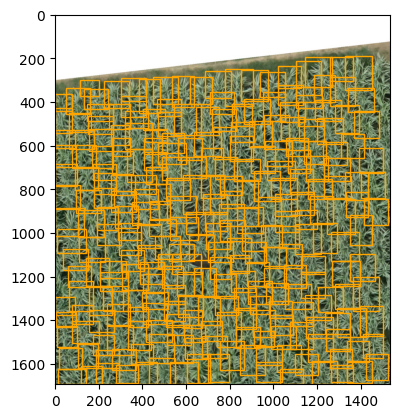

Prediction:  []


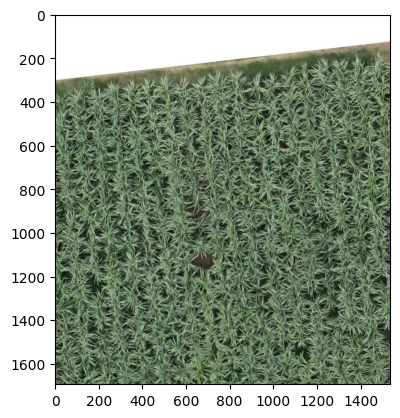

Jumlah label ground truth: 271
Jumlah label hasil prediksi: 0
Jumlah label yang sesuai antara ground truth dan prediksi: 0
Accuracy: nan%


<ipython-input-51-71f75cdb441f>:39: RuntimeWarning: invalid value encountered in scalar divide
  accuracy = matches / min_length * 100


In [ ]:
# GPU index untuk data yang digunakan
_idx = 1

# Pastikan tensor diubah menjadi numpy setelah dipindahkan ke CPU
print("Target (Ground Truth): ", annotations[_idx]['labels'].cpu().numpy())  # Pindahkan labels ke CPU sebelum dicetak

# Pindahkan gambar ke CPU untuk visualisasi
imgs_cpu = imgs[_idx].cpu()

# Pindahkan setiap tensor di dalam annotations (ground truth) ke CPU
annotations_cpu = {k: v.cpu().numpy() for k, v in annotations[_idx].items()}

# Visualisasikan gambar dan anotasi (ground truth)
plot_image_from_output(imgs_cpu, annotations_cpu)

# Pindahkan prediksi ke CPU
pred_cpu = {k: v.cpu().numpy() for k, v in pred[_idx].items()}

# Visualisasikan gambar dan prediksi
print("Prediction: ", pred_cpu['labels'])
plot_image_from_output(imgs_cpu, pred_cpu)

# Hitung label ground truth dan prediksi
ground_truth_labels = annotations[_idx]['labels'].cpu().numpy()
predicted_labels = pred[_idx]['labels'].cpu().numpy()

# Jumlah label asli (ground truth) dan hasil prediksi
print(f"Jumlah label ground truth: {len(ground_truth_labels)}")
print(f"Jumlah label hasil prediksi: {len(predicted_labels)}")

# Menyesuaikan panjang array jika ground truth dan prediksi berbeda panjang
min_length = min(len(ground_truth_labels), len(predicted_labels))

# Membandingkan hanya label yang sesuai dengan panjang terkecil
matches = np.sum(ground_truth_labels[:min_length] == predicted_labels[:min_length])
print(f"Jumlah label yang sesuai antara ground truth dan prediksi: {matches}")

# Menampilkan persentase kecocokan
accuracy = matches / min_length * 100
print(f"Accuracy: {accuracy:.2f}%")

In [ ]:
from tqdm import tqdm

labels = []
preds_adj_all = []
annot_all = []

for im, annot in tqdm(test_data_loader, position = 0, leave = True):
    im = list(img.to(device) for img in im)

    for t in annot:
        labels += t['labels']

    with torch.no_grad():
        preds_adj = make_prediction(model, im, 0.5)
        preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
        preds_adj_all.append(preds_adj)
        annot_all.append(annot)

100%|██████████| 8/8 [00:04<00:00,  1.96it/s]


In [ ]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils

Cloning into 'Tutorial-Book-Utils'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 45 (delta 18), reused 17 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 11.62 KiB | 11.62 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [ ]:
!mv /content/Tutorial-Book-Utils/utils_ObjectDetection.py /content/

In [ ]:
import utils_ObjectDetection as utils

# Menghitung True Positives, pred_scores, dan pred_labels dari batch statistics
sample_metrics = []
for batch_i in range(len(preds_adj_all)):
    sample_metrics += utils.get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5)

true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]

# Menghitung Precision, Recall, dan F1 Score
precision, recall, ap, f1, ap_class = utils.ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))

# Menghitung Akurasi
total_detections = true_positives.shape[0]  # Jumlah semua prediksi (TP + FP)
TP_sum = true_positives.sum()  # Jumlah True Positives
accuracy = TP_sum / total_detections  # Akurasi = TP / (TP + FP)

# Output hasil evaluasi
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Accuracy: {accuracy.item()}')

Precision: tensor([0])
Recall: tensor([0])
F1-score: tensor([0.])
Accuracy: nan


In [ ]:
# Menghitung statistik untuk setiap batch
sample_metrics = []
for batch_i in range(len(preds_adj_all)):
    sample_metrics += utils.get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5)

# Menggabungkan true positives, pred_scores, dan pred_labels
true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]  # all the batches get concatenated

# Menghitung precision, recall, AP, f1, dan ap_class
precision, recall, AP, f1, ap_class = utils.ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))

# Menghitung mAP
mAP = torch.mean(AP.float())  # Pastikan AP adalah float
print(f'mAP : {mAP}')
print(f'AP : {AP}')


mAP : 0.0
AP : tensor([0])


In [ ]:
sample_metrics = []
for batch_i in range(len(preds_adj_all)):
    sample_metrics += utils.get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5)

true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]

# Menghitung Precision, Recall, dan F1 Score
precision, recall, ap, f1, ap_class = utils.ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))

# Menghitung Akurasi
total_detections = true_positives.shape[0]  # Jumlah semua prediksi (TP + FP)
TP_sum = true_positives.sum()  # Jumlah True Positives
accuracy = TP_sum / total_detections  # Akurasi = TP / (TP + FP)

# Menghitung Mean Squared Error (MSE) dan Root Mean Squared Error (RMSE)
def calculate_mse_rmse(pred_labels, true_labels):
    """ Menghitung MSE dan RMSE """
    if len(pred_labels) != len(true_labels):
        raise ValueError("Jumlah prediksi dan jumlah label harus sama.")

    # Menghitung MSE
    mse = torch.mean((pred_labels - true_labels) ** 2)
    rmse = torch.sqrt(mse)

    return mse.item(), rmse.item()

# Filter pred_scores dan true_labels untuk memastikan ukurannya sama
valid_indices = true_positives.nonzero(as_tuple=True)[0]  # Ambil indeks True Positives
filtered_pred_scores = pred_scores[valid_indices]
filtered_true_labels = torch.tensor(labels)[valid_indices]

# Hitung MSE dan RMSE
mse, rmse = calculate_mse_rmse(filtered_pred_scores, filtered_true_labels)

# Output hasil MSE dan RMSE
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): nan
Root Mean Squared Error (RMSE): nan
